In [1]:
#import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import *

In [2]:
#set up directory and load in files
data_dir = "C:/Users/10331/OneDrive/Desktop/MBD project/mbddata/"

In [3]:
cali = pd.read_csv(data_dir + "cali.csv")

In [4]:
stdz = pd.read_csv(data_dir + "standardized.csv")
stdz = stdz.set_index("State")

In [5]:
cali.head()

,PercentOfBaseline,change,Unemploy
0,69.4,0.370478,5.3
1,58.5,0.209609,5.3
2,54.5,-0.173723,5.3
3,46.6,0.063920,15.5
4,45.2,0.642502,15.5


In [6]:
stdz

,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
State,,,,,,,,,,,,,,,,,
California,0.287096,-1.096177,-0.632456,1.426743,3/19/2020,Full,0.717595,2.567634,0.165865,1.958501,West,0.916740,3.013854,-0.209346,0.705328,0.724953,0.783142
Colorado,1.006923,-0.971521,-0.632456,-0.762034,3/26/2020,Full,0.327588,-0.245187,-0.164814,-0.252270,West,0.186509,-0.511088,-0.310288,0.652732,0.724953,1.124641
Florida,-0.915053,1.230726,-0.632456,1.879533,4/2/2020,Full,0.659032,1.718056,-0.663377,0.795799,South,-0.145414,1.130463,-0.148918,0.113849,0.113659,0.073802
Georgia,-1.448529,-1.013073,-0.632456,-0.657834,NaN,None,0.610437,0.201161,-0.422680,0.206261,South,-1.605875,-0.003710,-0.237955,3.719934,3.709184,3.647470
Hawaii,-0.461963,-0.015829,-0.632456,0.046893,3/2852020,Full,0.120746,-0.929161,-0.157958,-0.800868,Pacific Ocean,1.381432,-0.964639,-0.260393,-0.692629,-0.714368,-0.677254
Illinois,-0.447348,-0.431348,-0.632456,-0.458433,3/21/2020,Full,0.606699,0.512771,-0.056349,0.550158,Midwest,-0.610106,0.210837,-0.219719,0.583526,0.541565,0.483020
Massachusetts,-0.860244,0.191930,-0.632456,-0.403285,3/24/2020,Full,0.576794,-0.377964,0.430939,-0.366902,Northeast,0.186509,-0.392713,0.049984,-0.172202,-0.175317,-0.205707
Michigan,-0.308498,0.316585,-0.632456,-0.785545,3/24/2020,Full,0.463405,0.159515,-0.506703,0.198073,Midwest,-1.473106,-0.069561,-0.241248,-0.150056,-0.147531,-0.242366
North Carolina,-1.415643,-0.140485,-0.632456,-0.778579,3/30/2020,Full,0.569318,0.063484,-0.467239,-0.063945,South,-1.473106,-0.017217,-0.224906,-0.282931,-0.289240,-0.420335


In [7]:
#create a list of all measure names
listm = stdz.columns.values.tolist()

In [8]:
#import all corresponding meansures into california table with a loop
for i in listm:
    cali[i] = stdz.loc["California",i]

In [9]:
#input the lockdown data as binary variable
cali["Lockdown"] = [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [10]:
cali.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,69.4,0.370478,5.3,0.287096,-1.096177,-0.632456,1.426743,3/19/2020,0,0.717595,2.567634,0.165865,1.958501,West,0.91674,3.013854,-0.209346,0.705328,0.724953,0.783142
1,58.5,0.209609,5.3,0.287096,-1.096177,-0.632456,1.426743,3/19/2020,0,0.717595,2.567634,0.165865,1.958501,West,0.91674,3.013854,-0.209346,0.705328,0.724953,0.783142
2,54.5,-0.173723,5.3,0.287096,-1.096177,-0.632456,1.426743,3/19/2020,1,0.717595,2.567634,0.165865,1.958501,West,0.91674,3.013854,-0.209346,0.705328,0.724953,0.783142
3,46.6,0.063920,15.5,0.287096,-1.096177,-0.632456,1.426743,3/19/2020,1,0.717595,2.567634,0.165865,1.958501,West,0.91674,3.013854,-0.209346,0.705328,0.724953,0.783142
4,45.2,0.642502,15.5,0.287096,-1.096177,-0.632456,1.426743,3/19/2020,1,0.717595,2.567634,0.165865,1.958501,West,0.91674,3.013854,-0.209346,0.705328,0.724953,0.783142


In [11]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

alberta = pd.read_csv(data_dir + "alberta.csv")
for i in listm:
    alberta[i] = stdz.loc["Alberta",i]
alberta["Lockdown"] = [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
alberta.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,84.000000,-0.349727,8.7,1.613479,-0.597555,1.581139,-0.583966,3/17/2020,0,-1.399412,-0.884575,0.357102,-0.849996,Prairie Provinces,0.850355,-0.650728,-0.312598,-0.839346,-0.842184,-0.753058
1,70.833333,1.588235,8.7,1.613479,-0.597555,1.581139,-0.583966,3/17/2020,0,-1.399412,-0.884575,0.357102,-0.849996,Prairie Provinces,0.850355,-0.650728,-0.312598,-0.839346,-0.842184,-0.753058
2,75.833333,-0.311688,8.7,1.613479,-0.597555,1.581139,-0.583966,3/17/2020,1,-1.399412,-0.884575,0.357102,-0.849996,Prairie Provinces,0.850355,-0.650728,-0.312598,-0.839346,-0.842184,-0.753058
3,75.333333,-0.094340,13.4,1.613479,-0.597555,1.581139,-0.583966,3/17/2020,1,-1.399412,-0.884575,0.357102,-0.849996,Prairie Provinces,0.850355,-0.650728,-0.312598,-0.839346,-0.842184,-0.753058
4,82.500000,0.010417,13.4,1.613479,-0.597555,1.581139,-0.583966,3/17/2020,1,-1.399412,-0.884575,0.357102,-0.849996,Prairie Provinces,0.850355,-0.650728,-0.312598,-0.839346,-0.842184,-0.753058


In [12]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

britishcolumbia = pd.read_csv(data_dir + "britishcolumbia.csv")
for i in listm:
    britishcolumbia[i] = stdz.loc["British Columbia",i]
britishcolumbia["Lockdown"] = [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
britishcolumbia.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,90.333333,1.268519,7.2,0.407676,1.355381,1.581139,0.893771,3/18/2020,0,-1.399412,-0.878696,-0.319085,-0.702612,West Coast,1.315047,-0.574926,-0.312809,-0.872565,-0.881085,-0.814342
1,89.333333,-0.383673,7.2,0.407676,1.355381,1.581139,0.893771,3/18/2020,0,-1.399412,-0.878696,-0.319085,-0.702612,West Coast,1.315047,-0.574926,-0.312809,-0.872565,-0.881085,-0.814342
2,81.333333,-0.456954,7.2,0.407676,1.355381,1.581139,0.893771,3/18/2020,1,-1.399412,-0.878696,-0.319085,-0.702612,West Coast,1.315047,-0.574926,-0.312809,-0.872565,-0.881085,-0.814342
3,74.333333,0.073171,11.5,0.407676,1.355381,1.581139,0.893771,3/18/2020,1,-1.399412,-0.878696,-0.319085,-0.702612,West Coast,1.315047,-0.574926,-0.312809,-0.872565,-0.881085,-0.814342
4,82.666667,0.750000,11.5,0.407676,1.355381,1.581139,0.893771,3/18/2020,1,-1.399412,-0.878696,-0.319085,-0.702612,West Coast,1.315047,-0.574926,-0.312809,-0.872565,-0.881085,-0.814342


In [13]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

florida = pd.read_csv(data_dir + "florida.csv")
for i in listm:
    florida[i] = stdz.loc["Florida",i]
florida["Lockdown"] = [0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
florida.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,70.333333,1.292758,4.3,-0.915053,1.230726,-0.632456,1.879533,4/2/2020,0,0.659032,1.718056,-0.663377,0.795799,South,-0.145414,1.130463,-0.148918,0.113849,0.113659,0.073802
1,67.333333,0.729167,4.3,-0.915053,1.230726,-0.632456,1.879533,4/2/2020,0,0.659032,1.718056,-0.663377,0.795799,South,-0.145414,1.130463,-0.148918,0.113849,0.113659,0.073802
2,70.333333,0.373883,4.3,-0.915053,1.230726,-0.632456,1.879533,4/2/2020,0,0.659032,1.718056,-0.663377,0.795799,South,-0.145414,1.130463,-0.148918,0.113849,0.113659,0.073802
3,56.000000,-0.054597,12.9,-0.915053,1.230726,-0.632456,1.879533,4/2/2020,0,0.659032,1.718056,-0.663377,0.795799,South,-0.145414,1.130463,-0.148918,0.113849,0.113659,0.073802
4,64.333333,-0.070616,12.9,-0.915053,1.230726,-0.632456,1.879533,4/2/2020,1,0.659032,1.718056,-0.663377,0.795799,South,-0.145414,1.130463,-0.148918,0.113849,0.113659,0.073802


In [14]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

newyork = pd.read_csv(data_dir + "newyork.csv")
for i in listm:
    newyork[i] = stdz.loc["New York",i]
newyork["Lockdown"] = [0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
newyork.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,65.166667,0.154679,4.5,-1.083134,-0.098933,-0.632456,2.14308,3/22/2020,0,1.128786,0.908653,0.535559,0.378209,Northeast,0.717586,0.919073,-0.143773,0.353763,0.349841,0.143495
1,61.666667,0.176714,4.5,-1.083134,-0.098933,-0.632456,2.14308,3/22/2020,0,1.128786,0.908653,0.535559,0.378209,Northeast,0.717586,0.919073,-0.143773,0.353763,0.349841,0.143495
2,55.833333,0.186163,4.5,-1.083134,-0.098933,-0.632456,2.14308,3/22/2020,0,1.128786,0.908653,0.535559,0.378209,Northeast,0.717586,0.919073,-0.143773,0.353763,0.349841,0.143495
3,57.833333,-0.089809,14.5,-1.083134,-0.098933,-0.632456,2.14308,3/22/2020,1,1.128786,0.908653,0.535559,0.378209,Northeast,0.717586,0.919073,-0.143773,0.353763,0.349841,0.143495
4,53.500000,0.073976,14.5,-1.083134,-0.098933,-0.632456,2.14308,3/22/2020,1,1.128786,0.908653,0.535559,0.378209,Northeast,0.717586,0.919073,-0.143773,0.353763,0.349841,0.143495


In [15]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

manitoba = pd.read_csv(data_dir + "manitoba.csv")
for i in listm:
    manitoba[i] = stdz.loc["Manitoba",i]
manitoba["Lockdown"] = [0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
manitoba.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,92.666667,2.166667,6.4,1.090964,-0.556003,1.581139,-0.837192,3/20/2020,0,-1.648618,-0.982076,-0.490719,-0.899125,Prairie Provinces,-0.145414,-0.968476,-0.313299,-1.118937,-1.13116,-1.000375
1,95.000000,0.245614,6.4,1.090964,-0.556003,1.581139,-0.837192,3/20/2020,0,-1.648618,-0.982076,-0.490719,-0.899125,Prairie Provinces,-0.145414,-0.968476,-0.313299,-1.118937,-1.13116,-1.000375
2,100.000000,-0.492958,6.4,1.090964,-0.556003,1.581139,-0.837192,3/20/2020,0,-1.648618,-0.982076,-0.490719,-0.899125,Prairie Provinces,-0.145414,-0.968476,-0.313299,-1.118937,-1.13116,-1.000375
3,88.333333,-0.611111,11.4,1.090964,-0.556003,1.581139,-0.837192,3/20/2020,1,-1.648618,-0.982076,-0.490719,-0.899125,Prairie Provinces,-0.145414,-0.968476,-0.313299,-1.118937,-1.13116,-1.000375
4,90.666667,0.857143,11.4,1.090964,-0.556003,1.581139,-0.837192,3/20/2020,1,-1.648618,-0.982076,-0.490719,-0.899125,Prairie Provinces,-0.145414,-0.968476,-0.313299,-1.118937,-1.13116,-1.000375


In [16]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

ontario = pd.read_csv(data_dir + "ontario.csv")
for i in listm:
    ontario[i] = stdz.loc["Ontario",i]
ontario["Lockdown"] = [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
ontario.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,83.166667,0.753695,7.6,2.07753,0.607448,1.581139,2.046044,3/14/2020,0,-1.274809,-0.477914,-0.293042,-0.29321,Central Canada,1.447817,0.426197,-0.311118,-0.338296,-0.35037,-0.349326
1,76.166667,0.526685,7.6,2.07753,0.607448,1.581139,2.046044,3/14/2020,1,-1.274809,-0.477914,-0.293042,-0.29321,Central Canada,1.447817,0.426197,-0.311118,-0.338296,-0.35037,-0.349326
2,76.000000,0.436063,7.6,2.07753,0.607448,1.581139,2.046044,3/14/2020,1,-1.274809,-0.477914,-0.293042,-0.29321,Central Canada,1.447817,0.426197,-0.311118,-0.338296,-0.35037,-0.349326
3,53.666667,-0.409353,11.3,2.07753,0.607448,1.581139,2.046044,3/14/2020,1,-1.274809,-0.477914,-0.293042,-0.29321,Central Canada,1.447817,0.426197,-0.311118,-0.338296,-0.35037,-0.349326
4,74.166667,0.488069,11.3,2.07753,0.607448,1.581139,2.046044,3/14/2020,1,-1.274809,-0.477914,-0.293042,-0.29321,Central Canada,1.447817,0.426197,-0.311118,-0.338296,-0.35037,-0.349326


In [17]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

quebec = pd.read_csv(data_dir + "quebec.csv")
for i in listm:
    quebec[i] = stdz.loc["Quebec",i]
quebec["Lockdown"] = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
quebec.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,89.000000,0.390702,8.1,1.189621,1.56314,1.581139,0.075413,3/12/2020,1,-1.773221,-0.594033,-0.533131,-0.268646,Central Canada,1.580586,-0.21705,-0.312691,-0.756299,-0.756047,-0.711714
1,89.833333,0.485064,8.1,1.189621,1.56314,1.581139,0.075413,3/12/2020,1,-1.773221,-0.594033,-0.533131,-0.268646,Central Canada,1.580586,-0.21705,-0.312691,-0.756299,-0.756047,-0.711714
2,65.333333,0.161877,8.1,1.189621,1.56314,1.581139,0.075413,3/12/2020,1,-1.773221,-0.594033,-0.533131,-0.268646,Central Canada,1.580586,-0.21705,-0.312691,-0.756299,-0.756047,-0.711714
3,54.166667,-0.139736,17.0,1.189621,1.56314,1.581139,0.075413,3/12/2020,1,-1.773221,-0.594033,-0.533131,-0.268646,Central Canada,1.580586,-0.21705,-0.312691,-0.756299,-0.756047,-0.711714
4,60.000000,0.083373,17.0,1.189621,1.56314,1.581139,0.075413,3/12/2020,1,-1.773221,-0.594033,-0.533131,-0.268646,Central Canada,1.580586,-0.21705,-0.312691,-0.756299,-0.756047,-0.711714


In [18]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

colorado = pd.read_csv(data_dir + "colorado.csv")
for i in listm:
    colorado[i] = stdz.loc["Colorado",i]
colorado["Lockdown"] = [0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
colorado.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,66.0,1.130014,4.5,1.006923,-0.971521,-0.632456,-0.762034,3/26/2020,0,0.327588,-0.245187,-0.164814,-0.25227,West,0.186509,-0.511088,-0.310288,0.652732,0.724953,1.124641
1,59.6,0.258442,4.5,1.006923,-0.971521,-0.632456,-0.762034,3/26/2020,0,0.327588,-0.245187,-0.164814,-0.25227,West,0.186509,-0.511088,-0.310288,0.652732,0.724953,1.124641
2,50.2,-0.155315,4.5,1.006923,-0.971521,-0.632456,-0.762034,3/26/2020,0,0.327588,-0.245187,-0.164814,-0.25227,West,0.186509,-0.511088,-0.310288,0.652732,0.724953,1.124641
3,44.6,0.067807,11.3,1.006923,-0.971521,-0.632456,-0.762034,3/26/2020,1,0.327588,-0.245187,-0.164814,-0.25227,West,0.186509,-0.511088,-0.310288,0.652732,0.724953,1.124641
4,31.6,0.018307,11.3,1.006923,-0.971521,-0.632456,-0.762034,3/26/2020,1,0.327588,-0.245187,-0.164814,-0.25227,West,0.186509,-0.511088,-0.310288,0.652732,0.724953,1.124641


In [19]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

georgia = pd.read_csv(data_dir + "georgia.csv")
for i in listm:
    georgia[i] = stdz.loc["Georgia",i]
georgia["Lockdown"] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
georgia.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,82.8,1.048556,4.2,-1.448529,-1.013073,-0.632456,-0.657834,NaN,0,0.610437,0.201161,-0.42268,0.206261,South,-1.605875,-0.00371,-0.237955,3.719934,3.709184,3.64747
1,69.2,1.147341,4.2,-1.448529,-1.013073,-0.632456,-0.657834,NaN,0,0.610437,0.201161,-0.42268,0.206261,South,-1.605875,-0.00371,-0.237955,3.719934,3.709184,3.64747
2,64.2,0.314439,4.2,-1.448529,-1.013073,-0.632456,-0.657834,NaN,0,0.610437,0.201161,-0.42268,0.206261,South,-1.605875,-0.00371,-0.237955,3.719934,3.709184,3.64747
3,58.8,-0.089424,11.9,-1.448529,-1.013073,-0.632456,-0.657834,NaN,0,0.610437,0.201161,-0.42268,0.206261,South,-1.605875,-0.00371,-0.237955,3.719934,3.709184,3.64747
4,55.4,-0.072034,11.9,-1.448529,-1.013073,-0.632456,-0.657834,NaN,0,0.610437,0.201161,-0.42268,0.206261,South,-1.605875,-0.00371,-0.237955,3.719934,3.709184,3.64747


In [20]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

hawaii = pd.read_csv(data_dir + "hawaii.csv")
for i in listm:
    hawaii[i] = stdz.loc["Hawaii",i]
hawaii["Lockdown"] = [0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
hawaii.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,97.4,0.527273,2.6,-0.461963,-0.015829,-0.632456,0.046893,3/2852020,0,0.120746,-0.929161,-0.157958,-0.800868,Pacific Ocean,1.381432,-0.964639,-0.260393,-0.692629,-0.714368,-0.677254
1,96.4,1.095238,2.6,-0.461963,-0.015829,-0.632456,0.046893,3/2852020,0,0.120746,-0.929161,-0.157958,-0.800868,Pacific Ocean,1.381432,-0.964639,-0.260393,-0.692629,-0.714368,-0.677254
2,88.6,-0.482955,2.6,-0.461963,-0.015829,-0.632456,0.046893,3/2852020,0,0.120746,-0.929161,-0.157958,-0.800868,Pacific Ocean,1.381432,-0.964639,-0.260393,-0.692629,-0.714368,-0.677254
3,92.6,-0.241758,22.3,-0.461963,-0.015829,-0.632456,0.046893,3/2852020,0,0.120746,-0.929161,-0.157958,-0.800868,Pacific Ocean,1.381432,-0.964639,-0.260393,-0.692629,-0.714368,-0.677254
4,81.0,0.000000,22.3,-0.461963,-0.015829,-0.632456,0.046893,3/2852020,1,0.120746,-0.929161,-0.157958,-0.800868,Pacific Ocean,1.381432,-0.964639,-0.260393,-0.692629,-0.714368,-0.677254


In [21]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

illinois = pd.read_csv(data_dir + "illinois.csv")
for i in listm:
    illinois[i] = stdz.loc["Illinois",i]
illinois["Lockdown"] = [0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
illinois.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,77.0,1.492969,4.6,-0.447348,-0.431348,-0.632456,-0.458433,3/21/2020,0,0.606699,0.512771,-0.056349,0.550158,Midwest,-0.610106,0.210837,-0.219719,0.583526,0.541565,0.48302
1,69.2,0.661235,4.6,-0.447348,-0.431348,-0.632456,-0.458433,3/21/2020,0,0.606699,0.512771,-0.056349,0.550158,Midwest,-0.610106,0.210837,-0.219719,0.583526,0.541565,0.48302
2,70.4,0.144124,4.6,-0.447348,-0.431348,-0.632456,-0.458433,3/21/2020,0,0.606699,0.512771,-0.056349,0.550158,Midwest,-0.610106,0.210837,-0.219719,0.583526,0.541565,0.48302
3,64.8,0.125474,16.4,-0.447348,-0.431348,-0.632456,-0.458433,3/21/2020,1,0.606699,0.512771,-0.056349,0.550158,Midwest,-0.610106,0.210837,-0.219719,0.583526,0.541565,0.48302
4,62.0,0.041459,16.4,-0.447348,-0.431348,-0.632456,-0.458433,3/21/2020,1,0.606699,0.512771,-0.056349,0.550158,Midwest,-0.610106,0.210837,-0.219719,0.583526,0.541565,0.48302


In [22]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

mass = pd.read_csv(data_dir + "mass.csv")
for i in listm:
    mass[i] = stdz.loc["Massachusetts",i]
mass["Lockdown"] = [0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
mass.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,83.6,0.046665,2.9,-0.860244,0.19193,-0.632456,-0.403285,3/24/2020,0,0.576794,-0.377964,0.430939,-0.366902,Northeast,0.186509,-0.392713,0.049984,-0.172202,-0.175317,-0.205707
1,69.8,0.150174,2.9,-0.860244,0.19193,-0.632456,-0.403285,3/24/2020,0,0.576794,-0.377964,0.430939,-0.366902,Northeast,0.186509,-0.392713,0.049984,-0.172202,-0.175317,-0.205707
2,63.2,0.161861,2.9,-0.860244,0.19193,-0.632456,-0.403285,3/24/2020,0,0.576794,-0.377964,0.430939,-0.366902,Northeast,0.186509,-0.392713,0.049984,-0.172202,-0.175317,-0.205707
3,61.8,-0.285784,15.1,-0.860244,0.19193,-0.632456,-0.403285,3/24/2020,0,0.576794,-0.377964,0.430939,-0.366902,Northeast,0.186509,-0.392713,0.049984,-0.172202,-0.175317,-0.205707
4,59.6,-0.112567,15.1,-0.860244,0.19193,-0.632456,-0.403285,3/24/2020,1,0.576794,-0.377964,0.430939,-0.366902,Northeast,0.186509,-0.392713,0.049984,-0.172202,-0.175317,-0.205707


In [23]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

mich = pd.read_csv(data_dir + "mich.csv")
for i in listm:
    mich[i] = stdz.loc["Michigan",i]
mich["Lockdown"] = [0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
mich.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,63.4,1.170756,4.1,-0.308498,0.316585,-0.632456,-0.785545,3/24/2020,0,0.463405,0.159515,-0.506703,0.198073,Midwest,-1.473106,-0.069561,-0.241248,-0.150056,-0.147531,-0.242366
1,49.0,0.829758,4.1,-0.308498,0.316585,-0.632456,-0.785545,3/24/2020,0,0.463405,0.159515,-0.506703,0.198073,Midwest,-1.473106,-0.069561,-0.241248,-0.150056,-0.147531,-0.242366
2,50.4,-0.046646,4.1,-0.308498,0.316585,-0.632456,-0.785545,3/24/2020,0,0.463405,0.159515,-0.506703,0.198073,Midwest,-1.473106,-0.069561,-0.241248,-0.150056,-0.147531,-0.242366
3,47.4,-0.240280,22.7,-0.308498,0.316585,-0.632456,-0.785545,3/24/2020,0,0.463405,0.159515,-0.506703,0.198073,Midwest,-1.473106,-0.069561,-0.241248,-0.150056,-0.147531,-0.242366
4,48.6,-0.191297,22.7,-0.308498,0.316585,-0.632456,-0.785545,3/24/2020,1,0.463405,0.159515,-0.506703,0.198073,Midwest,-1.473106,-0.069561,-0.241248,-0.150056,-0.147531,-0.242366


In [24]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

nc = pd.read_csv(data_dir + "nc.csv")
for i in listm:
    nc[i] = stdz.loc["North Carolina",i]
nc["Lockdown"] = [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
nc.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,76.0,0.123242,4.4,-1.415643,-0.140485,-0.632456,-0.778579,3/30/2020,0,0.569318,0.063484,-0.467239,-0.063945,South,-1.473106,-0.017217,-0.224906,-0.282931,-0.28924,-0.420335
1,58.8,-0.114875,4.4,-1.415643,-0.140485,-0.632456,-0.778579,3/30/2020,0,0.569318,0.063484,-0.467239,-0.063945,South,-1.473106,-0.017217,-0.224906,-0.282931,-0.28924,-0.420335
2,62.2,0.350250,4.4,-1.415643,-0.140485,-0.632456,-0.778579,3/30/2020,0,0.569318,0.063484,-0.467239,-0.063945,South,-1.473106,-0.017217,-0.224906,-0.282931,-0.28924,-0.420335
3,63.4,0.118916,12.2,-1.415643,-0.140485,-0.632456,-0.778579,3/30/2020,0,0.569318,0.063484,-0.467239,-0.063945,South,-1.473106,-0.017217,-0.224906,-0.282931,-0.28924,-0.420335
4,47.6,0.143722,12.2,-1.415643,-0.140485,-0.632456,-0.778579,3/30/2020,0,0.569318,0.063484,-0.467239,-0.063945,South,-1.473106,-0.017217,-0.224906,-0.282931,-0.28924,-0.420335


In [25]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

nev = pd.read_csv(data_dir + "nev.csv")
for i in listm:
    nev[i] = stdz.loc["Nevada",i]
nev["Lockdown"] = [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
nev.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,35.4,3.253086,6.3,0.762109,-0.431348,-0.632456,-0.022186,4/2/2020,0,0.316373,-0.586684,-0.440715,-0.620731,West,-1.141183,-0.790863,-0.302233,0.016038,0.046972,-0.007348
1,27.4,0.059507,6.3,0.762109,-0.431348,-0.632456,-0.022186,4/2/2020,0,0.316373,-0.586684,-0.440715,-0.620731,West,-1.141183,-0.790863,-0.302233,0.016038,0.046972,-0.007348
2,34.8,-0.021918,6.3,0.762109,-0.431348,-0.632456,-0.022186,4/2/2020,0,0.316373,-0.586684,-0.440715,-0.620731,West,-1.141183,-0.790863,-0.302233,0.016038,0.046972,-0.007348
3,35.0,-0.050420,28.3,0.762109,-0.431348,-0.632456,-0.022186,4/2/2020,0,0.316373,-0.586684,-0.440715,-0.620731,West,-1.141183,-0.790863,-0.302233,0.016038,0.046972,-0.007348
4,25.2,-0.123894,28.3,0.762109,-0.431348,-0.632456,-0.022186,4/2/2020,0,0.316373,-0.586684,-0.440715,-0.620731,West,-1.141183,-0.790863,-0.302233,0.016038,0.046972,-0.007348


In [26]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

nj = pd.read_csv(data_dir + "nj.csv")
for i in listm:
    nj[i] = stdz.loc["New Jersey",i]
nj["Lockdown"] = [0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
nj.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,79.0,0.052890,3.8,-0.750625,0.358137,-0.632456,-0.573372,3/21/2020,0,0.610437,-0.134947,0.011241,-0.309586,Northeast,0.120125,-0.184925,0.183436,0.054793,0.046972,-0.176966
1,65.8,-0.074170,3.8,-0.750625,0.358137,-0.632456,-0.573372,3/21/2020,0,0.610437,-0.134947,0.011241,-0.309586,Northeast,0.120125,-0.184925,0.183436,0.054793,0.046972,-0.176966
2,63.0,0.025369,3.8,-0.750625,0.358137,-0.632456,-0.573372,3/21/2020,0,0.610437,-0.134947,0.011241,-0.309586,Northeast,0.120125,-0.184925,0.183436,0.054793,0.046972,-0.176966
3,67.4,-0.161350,15.3,-0.750625,0.358137,-0.632456,-0.573372,3/21/2020,1,0.610437,-0.134947,0.011241,-0.309586,Northeast,0.120125,-0.184925,0.183436,0.054793,0.046972,-0.176966
4,59.4,-0.159856,15.3,-0.750625,0.358137,-0.632456,-0.573372,3/21/2020,1,0.610437,-0.134947,0.011241,-0.309586,Northeast,0.120125,-0.184925,0.183436,0.054793,0.046972,-0.176966


In [27]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

tx = pd.read_csv(data_dir + "tx.csv")
for i in listm:
    tx[i] = stdz.loc["Texas",i]
tx["Lockdown"] = [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
tx.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,72.4,0.783107,4.7,0.086129,-1.885662,-0.632456,-0.403285,4/2/2020,0,0.594238,2.009578,-0.251784,3.301339,South,-0.742875,1.915603,-0.268004,0.625049,0.616587,0.726444
1,62.8,0.357018,4.7,0.086129,-1.885662,-0.632456,-0.403285,4/2/2020,0,0.594238,2.009578,-0.251784,3.301339,South,-0.742875,1.915603,-0.268004,0.625049,0.616587,0.726444
2,64.0,-0.181642,4.7,0.086129,-1.885662,-0.632456,-0.403285,4/2/2020,0,0.594238,2.009578,-0.251784,3.301339,South,-0.742875,1.915603,-0.268004,0.625049,0.616587,0.726444
3,61.8,0.120063,12.8,0.086129,-1.885662,-0.632456,-0.403285,4/2/2020,0,0.594238,2.009578,-0.251784,3.301339,South,-0.742875,1.915603,-0.268004,0.625049,0.616587,0.726444
4,51.2,0.030089,12.8,0.086129,-1.885662,-0.632456,-0.403285,4/2/2020,0,0.594238,2.009578,-0.251784,3.301339,South,-0.742875,1.915603,-0.268004,0.625049,0.616587,0.726444


In [28]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

va = pd.read_csv(data_dir + "va.csv")
for i in listm:
    va[i] = stdz.loc["Virginia",i]
va["Lockdown"] = [0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
va.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,64.0,1.285714,3.3,-1.119674,-0.348244,-0.632456,-0.756229,3/30/2020,0,0.475865,-0.217259,-0.207065,-0.194953,South,-0.477337,-0.221078,-0.231583,-0.260785,-0.292019,-0.419428
1,50.8,1.222756,3.3,-1.119674,-0.348244,-0.632456,-0.756229,3/30/2020,0,0.475865,-0.217259,-0.207065,-0.194953,South,-0.477337,-0.221078,-0.231583,-0.260785,-0.292019,-0.419428
2,48.8,0.178803,3.3,-1.119674,-0.348244,-0.632456,-0.756229,3/30/2020,0,0.475865,-0.217259,-0.207065,-0.194953,South,-0.477337,-0.221078,-0.231583,-0.260785,-0.292019,-0.419428
3,49.6,0.308869,10.6,-1.119674,-0.348244,-0.632456,-0.756229,3/30/2020,0,0.475865,-0.217259,-0.207065,-0.194953,South,-0.477337,-0.221078,-0.231583,-0.260785,-0.292019,-0.419428
4,44.8,0.102804,10.6,-1.119674,-0.348244,-0.632456,-0.756229,3/30/2020,1,0.475865,-0.217259,-0.207065,-0.194953,South,-0.477337,-0.221078,-0.231583,-0.260785,-0.292019,-0.419428


In [29]:
#repeating the process
#import all corresponding meansures into table with a loop
#input the lockdown data as binary variable

wash = pd.read_csv(data_dir + "wash.csv")
for i in listm:
    wash[i] = stdz.loc["Washington",i]
wash["Lockdown"] = [0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
wash.head()

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,67.4,0.029260,5.1,0.594027,-0.556003,-0.632456,-0.64129,3/23/2020,0,1.366778,-0.873796,4.204347,-0.899125,South,-1.074798,-1.038813,4.438215,-0.233103,-0.23089,-0.100428
1,61.4,-0.515050,5.1,0.594027,-0.556003,-0.632456,-0.64129,3/23/2020,0,1.366778,-0.873796,4.204347,-0.899125,South,-1.074798,-1.038813,4.438215,-0.233103,-0.23089,-0.100428
2,57.8,0.016379,5.1,0.594027,-0.556003,-0.632456,-0.64129,3/23/2020,0,1.366778,-0.873796,4.204347,-0.899125,South,-1.074798,-1.038813,4.438215,-0.233103,-0.23089,-0.100428
3,54.6,-0.152672,15.4,0.594027,-0.556003,-0.632456,-0.64129,3/23/2020,1,1.366778,-0.873796,4.204347,-0.899125,South,-1.074798,-1.038813,4.438215,-0.233103,-0.23089,-0.100428
4,47.0,0.094094,15.4,0.594027,-0.556003,-0.632456,-0.64129,3/23/2020,1,1.366778,-0.873796,4.204347,-0.899125,South,-1.074798,-1.038813,4.438215,-0.233103,-0.23089,-0.100428


In [30]:
#combine all countries into one big table

combine = [cali, alberta, britishcolumbia,florida,newyork,manitoba,ontario,quebec,colorado,georgia,hawaii,illinois,mass,mich,nc,nev,nj,tx,va,wash]
combine = pd.concat(combine)

In [31]:
combine

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Date,Lockdown,Gini,ICU Beds,GDP,Hospitals,Region,Life Expectancy,"Population, 2019",pop per km2,outDegree,inDegree,pagerank
0,69.4,0.370478,5.3,0.287096,-1.096177,-0.632456,1.426743,3/19/2020,0,0.717595,2.567634,0.165865,1.958501,West,0.916740,3.013854,-0.209346,0.705328,0.724953,0.783142
1,58.5,0.209609,5.3,0.287096,-1.096177,-0.632456,1.426743,3/19/2020,0,0.717595,2.567634,0.165865,1.958501,West,0.916740,3.013854,-0.209346,0.705328,0.724953,0.783142
2,54.5,-0.173723,5.3,0.287096,-1.096177,-0.632456,1.426743,3/19/2020,1,0.717595,2.567634,0.165865,1.958501,West,0.916740,3.013854,-0.209346,0.705328,0.724953,0.783142
3,46.6,0.063920,15.5,0.287096,-1.096177,-0.632456,1.426743,3/19/2020,1,0.717595,2.567634,0.165865,1.958501,West,0.916740,3.013854,-0.209346,0.705328,0.724953,0.783142
4,45.2,0.642502,15.5,0.287096,-1.096177,-0.632456,1.426743,3/19/2020,1,0.717595,2.567634,0.165865,1.958501,West,0.916740,3.013854,-0.209346,0.705328,0.724953,0.783142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,68.8,0.326481,9.8,0.594027,-0.556003,-0.632456,-0.641290,3/23/2020,1,1.366778,-0.873796,4.204347,-0.899125,South,-1.074798,-1.038813,4.438215,-0.233103,-0.230890,-0.100428
16,63.6,0.078396,9.8,0.594027,-0.556003,-0.632456,-0.641290,3/23/2020,1,1.366778,-0.873796,4.204347,-0.899125,South,-1.074798,-1.038813,4.438215,-0.233103,-0.230890,-0.100428
17,68.6,0.278952,9.8,0.594027,-0.556003,-0.632456,-0.641290,3/23/2020,1,1.366778,-0.873796,4.204347,-0.899125,South,-1.074798,-1.038813,4.438215,-0.233103,-0.230890,-0.100428
18,65.8,0.045274,9.8,0.594027,-0.556003,-0.632456,-0.641290,3/23/2020,1,1.366778,-0.873796,4.204347,-0.899125,South,-1.074798,-1.038813,4.438215,-0.233103,-0.230890,-0.100428


In [32]:
#standarize the PercentOfBaseline for Ridge regression 
combine["PercentOfBaseline"] = (combine["PercentOfBaseline"]-mean(combine["PercentOfBaseline"]))/stdev(combine["PercentOfBaseline"])

In [33]:
#standarize the Unemploy for Ridge regression 
combine["Unemploy"] = (combine["Unemploy"]-mean(combine["Unemploy"]))/stdev(combine["Unemploy"])

In [34]:
#making region binary dummies varibales 
for i in combine['Region'].unique():
    combine.loc[combine.Region == i,i] = 1

In [35]:
#clean the set
combine = combine.fillna(0)

In [36]:
#remove the unneeded columns
combine=combine.drop("Region",axis = 1)
combine=combine.drop("Date",axis = 1)
combine

,PercentOfBaseline,change,Unemploy,Sex Ratio,MedianAge,efficiency of health systems,2019 Visitation,Lockdown,Gini,ICU Beds,...,inDegree,pagerank,West,Prairie Provinces,West Coast,South,Northeast,Central Canada,Pacific Ocean,Midwest
0,0.457842,0.370478,-1.490874,0.287096,-1.096177,-0.632456,1.426743,0,0.717595,2.567634,...,0.724953,0.783142,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.228787,0.209609,-1.490874,0.287096,-1.096177,-0.632456,1.426743,0,0.717595,2.567634,...,0.724953,0.783142,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.480761,-0.173723,-1.490874,0.287096,-1.096177,-0.632456,1.426743,1,0.717595,2.567634,...,0.724953,0.783142,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.978409,0.063920,0.517634,0.287096,-1.096177,-0.632456,1.426743,1,0.717595,2.567634,...,0.724953,0.783142,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.066600,0.642502,0.517634,0.287096,-1.096177,-0.632456,1.426743,1,0.717595,2.567634,...,0.724953,0.783142,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.420046,0.326481,-0.604768,0.594027,-0.556003,-0.632456,-0.641290,1,1.366778,-0.873796,...,-0.230890,-0.100428,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16,0.092480,0.078396,-0.604768,0.594027,-0.556003,-0.632456,-0.641290,1,1.366778,-0.873796,...,-0.230890,-0.100428,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17,0.407447,0.278952,-0.604768,0.594027,-0.556003,-0.632456,-0.641290,1,1.366778,-0.873796,...,-0.230890,-0.100428,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18,0.231065,0.045274,-0.604768,0.594027,-0.556003,-0.632456,-0.641290,1,1.366778,-0.873796,...,-0.230890,-0.100428,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
#Clean the set
combine = combine.dropna()

In [38]:
import math
combine = combine.loc[combine.change!=math.inf, :]

In [39]:
#calculating some interaction terms
combine["PBxInD"] = combine["PercentOfBaseline"] * combine["inDegree"]

In [40]:
combine["PBxOutD"] = combine["PercentOfBaseline"] * combine["outDegree"]

In [41]:
combine["PBxPr"] = combine["PercentOfBaseline"] * combine["pagerank"]

In [44]:
#do a correlation heatmap
corr = combine.corr()

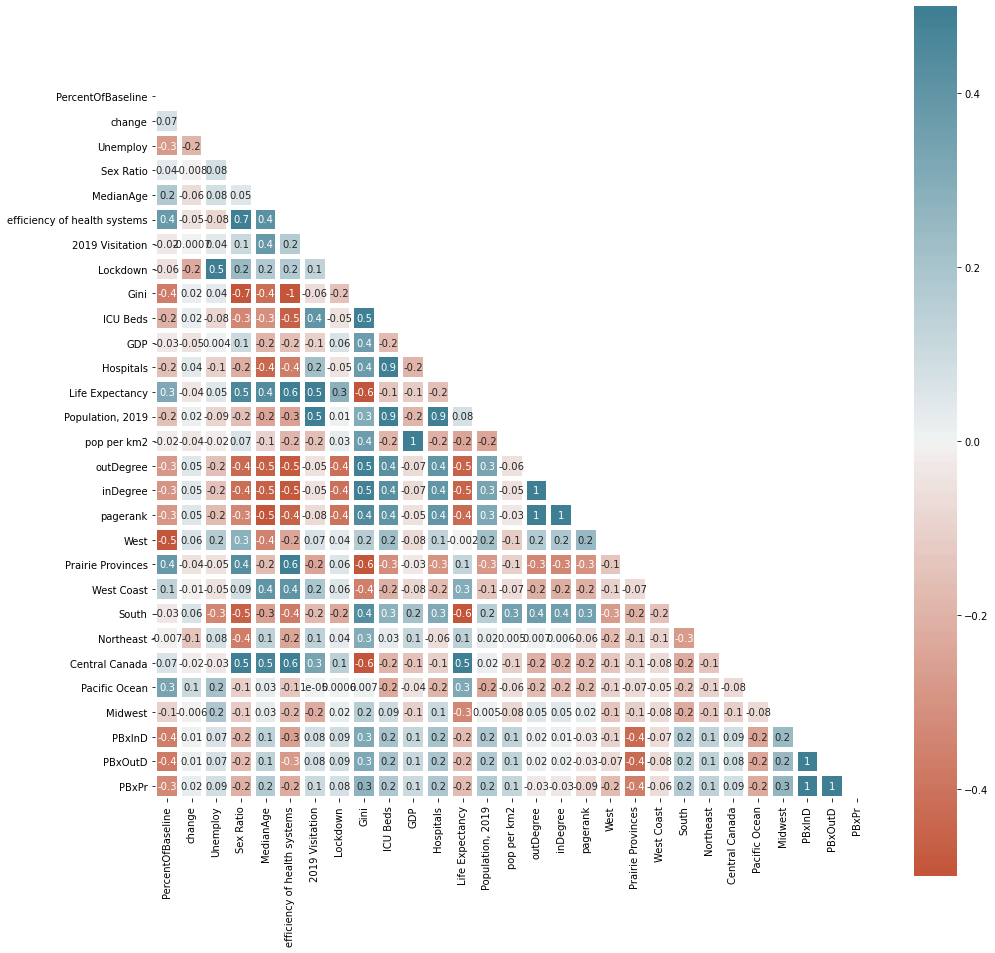

In [60]:
mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(16, 16))
ax = sns.heatmap(
    corr,
    vmin=-.5, vmax=.5, center=0,
    cmap= sns.diverging_palette(20,220, n=200),
    square = True, 
    linewidth=4,
    annot = True, 
    fmt='.1g',
    mask = mask
    )

In [46]:
#import statistical packages

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [51]:
import statsmodels
import statsmodels.api as sm

In [52]:
#define X's(the factors related to flight network) and Y
X = combine.loc[:,['PercentOfBaseline','outDegree','inDegree','pagerank','PBxInD','PBxOutD','PBxPr']]
y = combine[["change"]]

In [53]:
#Run the model and produce report
model = sm.OLS(y , X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 change   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.048
Method:                 Least Squares   F-statistic:                              3.836
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                    0.000476
Time:                        07:27:24   Log-Likelihood:                         -278.84
No. Observations:                 398   AIC:                                      571.7
Df Residuals:                     391   BIC:                                      599.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
PercentOfBaseline     0.0791      0.036      2.218      0.027       0.009       0.149
outDegree             0.8667      1.790      0.484      0.629      -2.653       4.386
inDegree             -0.9535      1.922     -0.496      0.620      -4.732       2.825
pagerank              0.1599      0.254      0.631      0.528      -0.338       0.658
PBxInD               -6.2341      1.369     -4.553      0.000      -8.926      -3.542
PBxOutD               5.6187      1.289      4.359      0.000       3.085       8.153
PBxPr                 0.7128      0.242      2.950      0.003       0.238       1.188
==============================================================================
Omnibus:                      311.744   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8875.843
Skew:                           3.011   Prob(JB):                         0.00
Kurtosis:                      25.337   Cond. No.                         189.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#including all variables
X = combine.loc[:,['PercentOfBaseline','Unemploy','Sex Ratio','MedianAge','efficiency of health systems','2019 Visitation','Lockdown','Gini','ICU Beds','GDP','Hospitals',
                   'Life Expectancy','Population, 2019','pop per km2','outDegree','inDegree','pagerank','West','Prairie Provinces','West Coast','South','Northeast','Central Canada','Pacific Ocean','Midwest','PBxInD','PBxOutD','PBxPr']]

In [55]:
#Run the model and produce report
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 change   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2.454
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           0.000167
Time:                        07:27:24   Log-Likelihood:                -253.95
No. Observations:                 398   AIC:                             559.9
Df Residuals:                     372   BIC:                             663.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
PercentOfBaseline                0.1275      0.053      2.427      0.016       0.024       0.231
Unemploy                        -0.0926      0.041     -2.268      0.024      -0.173      -0.012
Sex Ratio                       -0.4609      0.442     -1.043      0.298      -1.330       0.408
MedianAge                        0.7470      0.478      1.563      0.119      -0.193       1.687
efficiency of health systems     0.3600      0.765      0.471      0.638      -1.144       1.865
2019 Visitation                  0.2579      0.230      1.123      0.262      -0.194       0.710
Lockdown                        -0.1375      0.090     -1.526      0.128      -0.315       0.040
Gini                             1.0942      1.252      0.874      0.383      -1.367       3.555
ICU Beds                        -2.6852      1.932     -1.390      0.165      -6.484       1.114
GDP                             -0.3817      0.597     -0.640      0.523      -1.555       0.792
Hospitals                        1.6109      1.146      1.405      0.161      -0.643       3.865
Life Expectancy                  0.3201      0.339      0.944      0.346      -0.347       0.987
Population, 2019                 0.7910      0.608      1.302      0.194      -0.404       1.986
pop per km2                      0.3567      0.531      0.672      0.502      -0.687       1.401
outDegree                       -1.2541      1.267     -0.990      0.323      -3.746       1.238
inDegree                         1.5608      1.098      1.422      0.156      -0.598       3.720
pagerank                        -0.1408      0.517     -0.272      0.785      -1.157       0.875
West                             1.4854      0.852      1.744      0.082      -0.190       3.160
Prairie Provinces                2.0846      1.486      1.403      0.162      -0.838       5.007
West Coast                      -0.9969      0.880     -1.132      0.258      -2.728       0.734
South                            0.1000      0.201      0.497      0.619      -0.295       0.495
Northeast                       -0.7746      0.622     -1.245      0.214      -1.998       0.449
Central Canada                  -0.5486      0.528     -1.038      0.300      -1.588       0.490
Pacific Ocean                   -0.4693      0.774     -0.606      0.545      -1.991       1.052
Midwest                          0.4368      0.305      1.434      0.152      -0.162       1.036
PBxInD                          -2.6961      3.436     -0.785      0.433      -9.452       4.060
PBxOutD                          2.5622      3.137      0.817      0.415      -3.607       8.731
PBxPr                            0.2319      0.467      0.497      0.620      -0.686       1.149
============================================================================

In [56]:
#Doing a cross validation and gridsearch to find the best parameter for ridge regression

inner_cv = KFold(n_splits=10, shuffle=True)
outer_cv = KFold(n_splits=10, shuffle=True)
gs = GridSearchCV(estimator=Ridge(random_state=42),
                  param_grid=[{'alpha': [ 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000],
                              "normalize":[True,False]}],
                  scoring='neg_mean_squared_error',
                  cv=inner_cv)

In [57]:
gs_lr = gs.fit(X,y)

In [58]:
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)

Optimal Parameter:  {'alpha': 10, 'normalize': False}
Optimal Estimator:  Ridge(alpha=10, random_state=42)


In [59]:
##Run the ridge regression model and produce report
results_fr = model.fit_regularized(L1_wt=1, alpha = 0.00001, start_params=results.params)
final = sm.regression.linear_model.OLSResults(model, 
                                              results_fr.params, 
                                              model.normalized_cov_params)

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 change   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2.454
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           0.000167
Time:                        07:27:27   Log-Likelihood:                -253.95
No. Observations:                 398   AIC:                             559.9
Df Residuals:                     372   BIC:                             663.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
PercentOfBaseline                0.1274      0.053      2.425      0.016       0.024       0.231
Unemploy                        -0.0926      0.041     -2.269      0.024      -0.173      -0.012
Sex Ratio                       -0.4603      0.442     -1.041      0.298      -1.329       0.409
MedianAge                        0.7463      0.478      1.562      0.119      -0.193       1.686
efficiency of health systems     0.3581      0.765      0.468      0.640      -1.146       1.863
2019 Visitation                  0.2576      0.230      1.121      0.263      -0.194       0.709
Lockdown                        -0.1374      0.090     -1.524      0.128      -0.315       0.040
Gini                             1.0930      1.252      0.873      0.383      -1.368       3.554
ICU Beds                        -2.6827      1.932     -1.388      0.166      -6.482       1.116
GDP                             -0.3807      0.597     -0.638      0.524      -1.554       0.793
Hospitals                        1.6089      1.146      1.404      0.161      -0.645       3.863
Life Expectancy                  0.3191      0.339      0.940      0.348      -0.348       0.986
Population, 2019                 0.7909      0.608      1.302      0.194      -0.404       1.986
pop per km2                      0.3556      0.531      0.670      0.503      -0.689       1.400
outDegree                       -1.2544      1.267     -0.990      0.323      -3.747       1.238
inDegree                         1.5598      1.098      1.421      0.156      -0.599       3.719
pagerank                        -0.1397      0.517     -0.270      0.787      -1.156       0.877
West                             1.4826      0.852      1.741      0.083      -0.192       3.158
Prairie Provinces                2.0847      1.486      1.403      0.162      -0.838       5.007
West Coast                      -0.9925      0.880     -1.127      0.260      -2.724       0.738
South                            0.0987      0.201      0.491      0.624      -0.297       0.494
Northeast                       -0.7744      0.622     -1.244      0.214      -1.998       0.449
Central Canada                  -0.5450      0.528     -1.031      0.303      -1.584       0.494
Pacific Ocean                   -0.4678      0.774     -0.605      0.546      -1.989       1.054
Midwest                          0.4350      0.305      1.428      0.154      -0.164       1.034
PBxInD                          -2.6943      3.436     -0.784      0.433      -9.450       4.061
PBxOutD                          2.5604      3.137      0.816      0.415      -3.608       8.729
PBxPr                            0.2318      0.467      0.497      0.620      -0.686       1.149
============================================================================